## Report No.03 似て非なる、解きにくい問題
\begin{equation}
 \frac{du}{dt} = -\sqrt{u}
\end{equation}
という常微分方程式に基づく時間発展問題を、
たとえば時間t=0での初期値$u_0 = 0.25$のもとで考えよう。  
このとき、Euler スキームを構成し、$\Delta t$ をいろいろ変えて計算して結果を見比べることで以下の問にチャレンジしよう．

- 厳密解があるとして、どんな形であると推測されるか．推測してみよう．

【解答】

In [1]:
u0 = 0.25     #初期値を設定
Δt = 0.0001

Eular(u) = u - Δt * √u   #オイラースキームを関数として定義

u_sq = [u0]    #結果をためておく配列
t_sq = [0.0]

u = u0

for n in 1:1/Δt
    u = Eular(u)
    t = n * Δt
    if u < 0
        println(n,":",u)    #uが負になったときのnの値と、uの値を表示する
        break              #uが負の値になったらループを抜ける
    else        
        push!(u_sq, u)  　#uが負になるまでは、uとtをそれぞれの配列に格納
        push!(t_sq, t)
        continue
    end
end

9995.0:-1.4168689429323149e-9


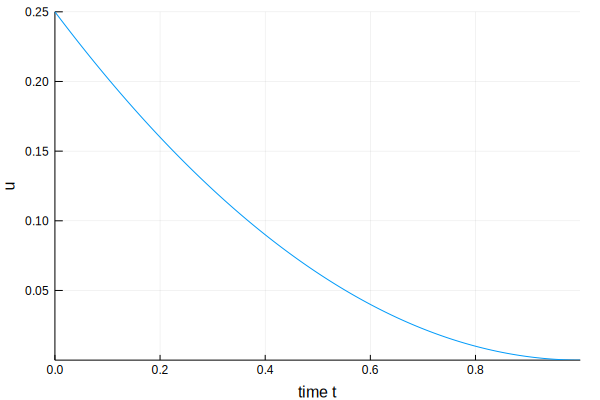

In [2]:
using Plots
gr()

plot(t_sq, u_sq, xaxis = "time t ", yaxis = "u", legend = false )

以上の手続きから、この常微分方程式の厳密解は上記のような形になると推測した。  
また、$\Delta t$の値が大きい時のグラフは以下のようになった。

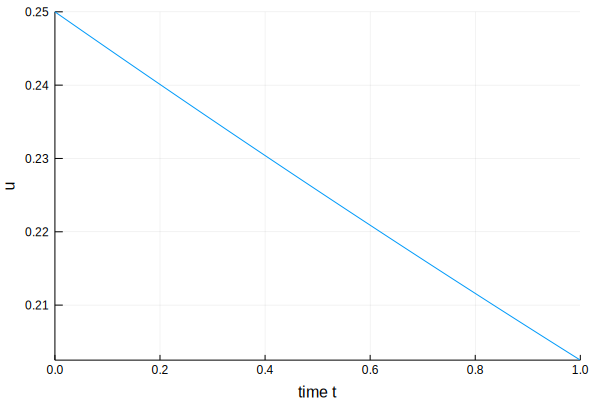

In [3]:
Δt2 = 0.001

u_sq2 = [u0]    #結果をためておく配列
t_sq2 = [0.0]

u = u0

for n in 1:1/Δt2
    u = Eular(u)
    t = n * Δt2
    if u < 0
        println(n,":",u)    #uが負になったときのnの値と、uの値を表示する
        break              #uが負の値になったらループを抜ける
    else        
        push!(u_sq2, u)  　#uが負になるまでは、uとtをそれぞれの配列に格納
        push!(t_sq2, t)
        continue
    end
end

plot(t_sq2, u_sq2, xaxis = "time t ", yaxis = "u", legend = false )

- Euler 法では実質的に$ t \in [0, T)$ で近似解が求めることができるとすると、T はいくつぐらいか.  
そしてそれはどうしてその値になるのか
    
【解答】

\begin{equation}
 \frac{du}{dt} = -\sqrt{u}
\end{equation}

まず、この常微分方程式をEularスキームにより近似すると
\begin{equation}
 \frac{u_{n+1} - u_n}{\Delta t} = -\sqrt{u_n}
\end{equation}
という式になる。これを変形すると
\begin{equation}
{u_{n+1}} = {u_n} - \Delta t \sqrt{u_n}
\end{equation}
となる。
$\sqrt{u_n}$が存在するためには${u_n}>0$つまり${u_{n+1}}>0$である必要がある。  
よって、
\begin{equation}
{u_n}-\Delta t \sqrt{u_n} >0
\end{equation}
が成り立つ。これを整理すると
\begin{equation}
\Delta t < \sqrt {u_n}
\end{equation}
となる。したがってTは$\sqrt{u_n}$以下である必要がある。  
近似の精度を上げるにつれて、nが大きい時の${u_n}$は0に近づくため、$\Delta t$も小さくなければならない。

---

- (チャレンジ問題) 厳密解を式で書けるか. 手で問題を解いてみよう．

【解答】  
\begin{equation}
 \frac{du}{dt} = -\sqrt{u}
\end{equation}
を変数分離法により解く。
\begin{equation}
 \int -u^{-1/2} du = \int dt
\end{equation}
両辺を積分し
\begin{equation}
 -2u^{1/2} = t + C
\end{equation}
ただし、Cは積分定数とする。ここで初期条件t=0,u=0.25より次のようにCが求まる。
\begin{equation}
 C = -2(0.25)^{1/2}
\end{equation}
このCの値を先の式に代入すると
\begin{equation}
 -2u^{1/2} = t -2(0.25)^{1/2}
\end{equation}
が得られ、両辺を二乗して整理すると
\begin{equation}
 u = 0.25 t^2 - (0.25)^{1/2}t + 0.25
\end{equation}
となり、厳密解が式で得られる。  
この厳密解がオイラー法による近似解とどれほど近いのかを調べるため、以下に両者のプロットを示す。


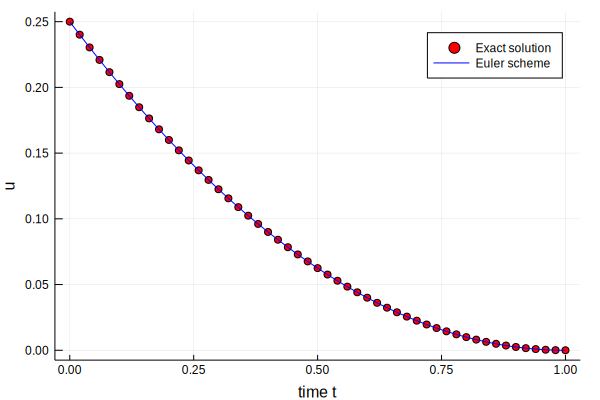

In [4]:
v = [ 0.25*(t^2) - ((0.25)^(0.5))*t + 0.25 for t in 0.0:0.02:1]
t_sq2 = [ n*0.02 for n in 0:50]
plot(t_sq2, v, st = :scatter, color = :red, label = "Exact solution")
plot!(t_sq, u_sq, xaxis = "time t ", yaxis = "u", color = :blue, label = "Euler scheme" )

この結果から、今回の微分方程式については$\Delta t=0.0001$としたときのオイラー法による近似解は、厳密解とほぼ一致することがわかる。